# Problem Statement:

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/train_ctrUa4K.csv")

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Drop the irrelevant column

data = data.drop('Loan_ID', axis = 1)

In [ ]:
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Exploratory Data Analysis

In [ ]:
# Checking the class distribution

data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

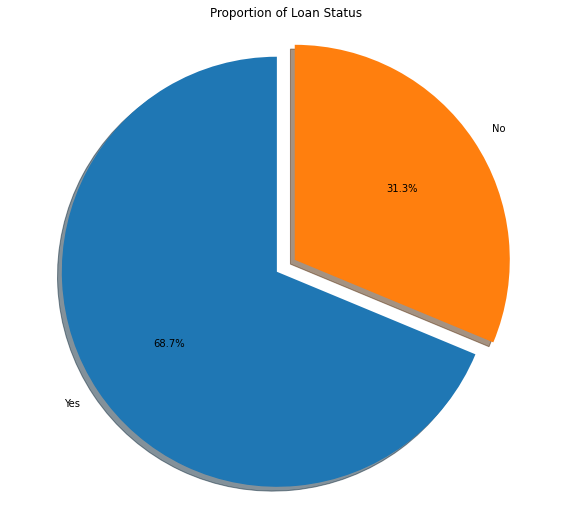

In [ ]:
# Pie Chart

labels = "Yes", "No"
sizes = [data.Loan_Status[data['Loan_Status'] == 'Y'].count(), data.Loan_Status[data['Loan_Status'] == 'N'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (10, 9))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', startangle= 90, shadow = True)
ax1.axis('equal')

plt.title("Proportion of Loan Status", size = 12)
plt.show()

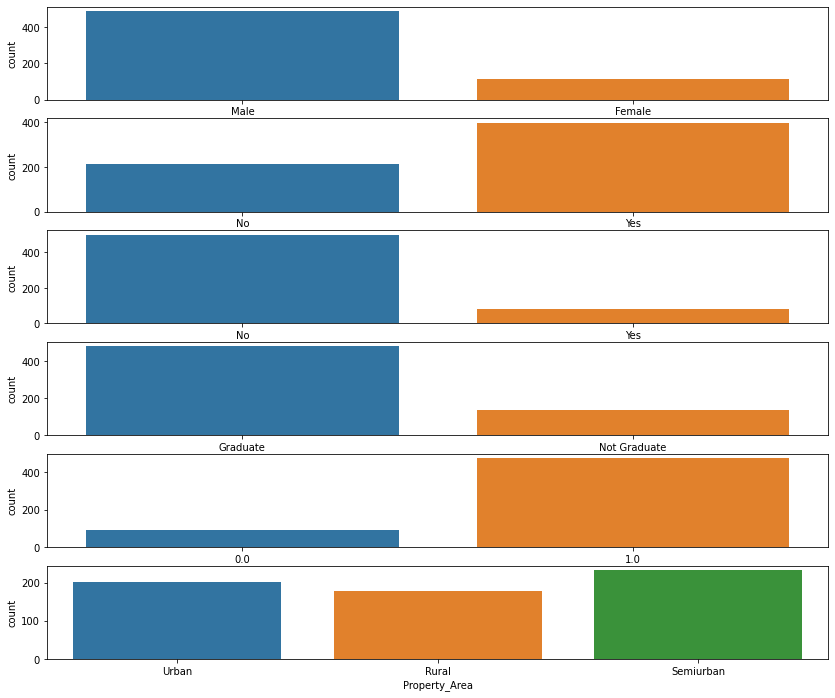

In [ ]:
fig, ax = plt.subplots(nrows= 6, ncols=1, figsize=(14, 12))

cols = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'Property_Area']

for r, c in enumerate(cols):
  sns.countplot(x = c, data = data, ax = ax[r])

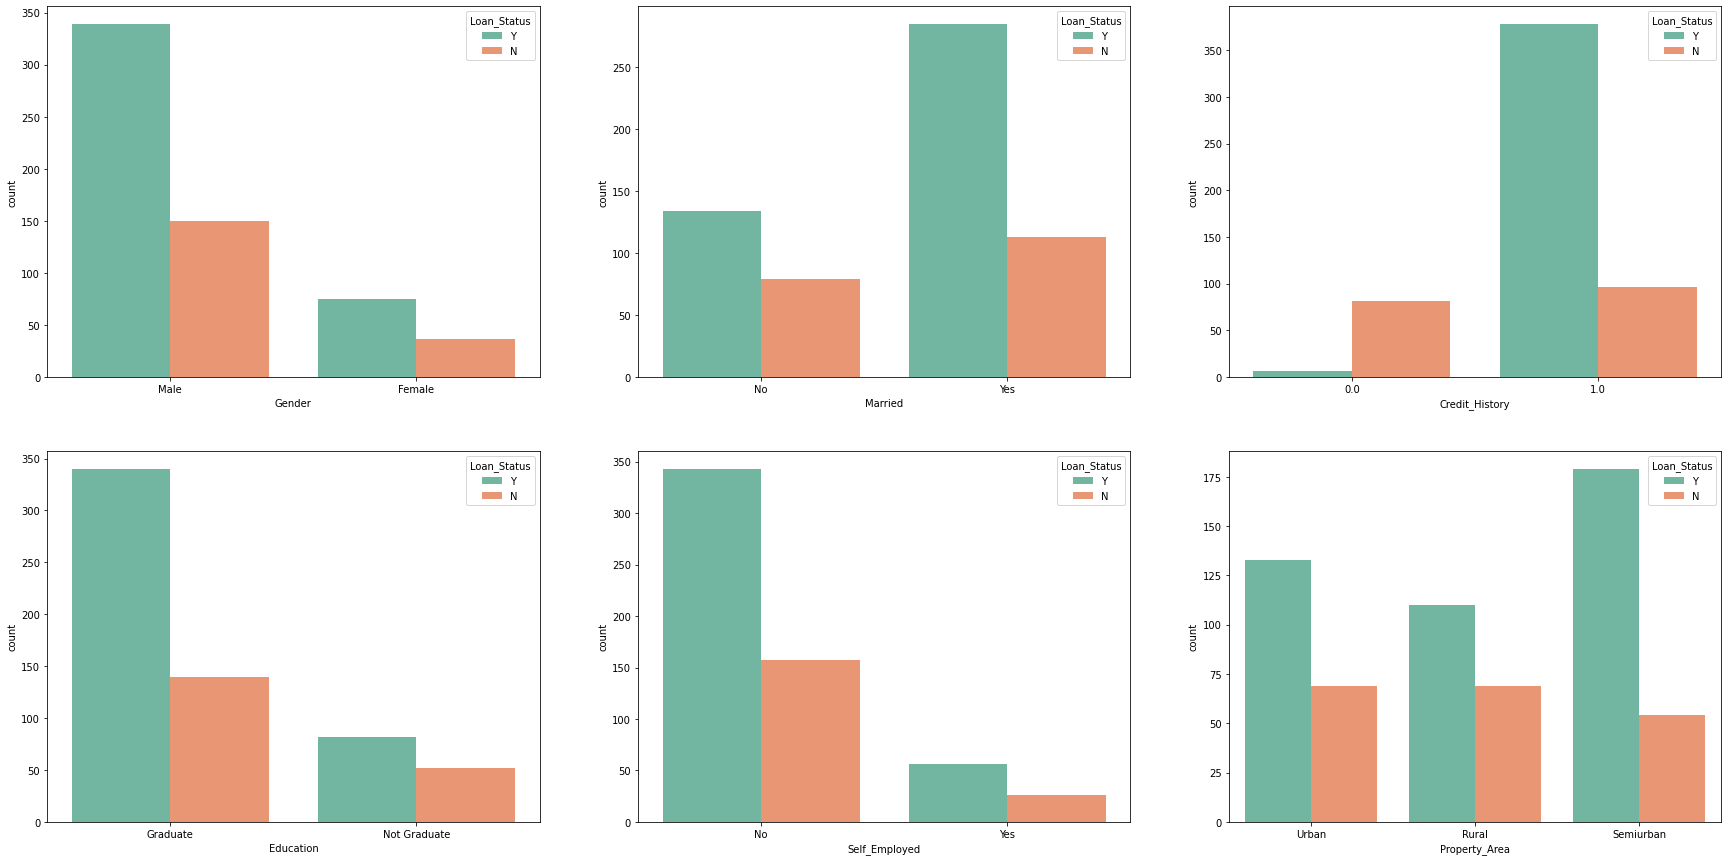

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (30, 15))

sns.countplot(x = "Gender", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[0][0])
sns.countplot(x = "Married", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[0][1])
sns.countplot(x = "Credit_History", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[0][2])
sns.countplot(x = "Education", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[1][0])
sns.countplot(x = "Self_Employed", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[1][1])
sns.countplot(x = "Property_Area", hue = "Loan_Status", data = data, palette = 'Set2', ax = ax[1][2])

plt.show()

In [ ]:
num_cols = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

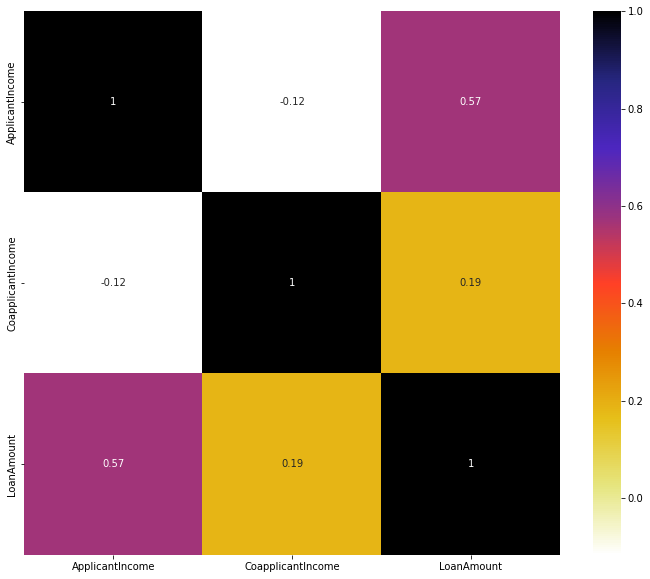

In [ ]:
plt.figure(figsize = (12, 10))
cor = num_cols.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

## Feature Engineering

In [ ]:
# Checking for missing values

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


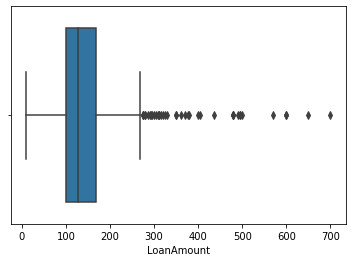

In [ ]:
sns.boxplot(data['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


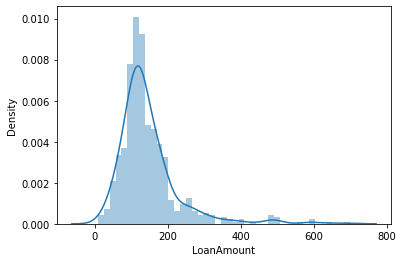

In [ ]:
sns.distplot(data['LoanAmount'])

In [ ]:
# outlier treatment for Age
Q1 = data.LoanAmount.quantile(0.25)
Q3 = data.LoanAmount.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.LoanAmount >= Q1 - 1.5*IQR) & (data.LoanAmount <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


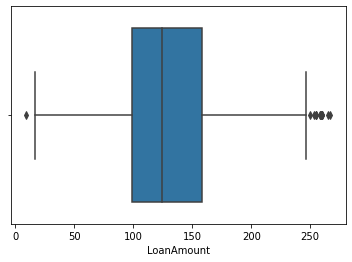

In [ ]:
sns.boxplot(data['LoanAmount'])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
# Handle the Missing values

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median, inplace = True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
# Handling Categorical Variables

from sklearn.preprocessing import LabelEncoder

cat_cols = ['Loan_Status', 'Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education']

le = LabelEncoder()
for i in cat_cols:
  data[i] = le.fit_transform(data[i])

In [ ]:
X = data[['Gender', 'Married', 'Self_Employed', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = data['Loan_Status']

In [ ]:
X

,Gender,Married,Self_Employed,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount
1,1,1,0,1.0,4583,1508.0,128.0
2,1,1,1,1.0,3000,0.0,66.0
3,1,1,0,1.0,2583,2358.0,120.0
4,1,0,0,1.0,6000,0.0,141.0
5,1,1,1,1.0,5417,4196.0,267.0
...,...,...,...,...,...,...,...
609,0,0,0,1.0,2900,0.0,71.0
610,1,1,0,1.0,4106,0.0,40.0
611,1,1,0,1.0,8072,240.0,253.0
612,1,1,0,1.0,7583,0.0,187.0


In [ ]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=35)

In [ ]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=35)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.7913669064748201

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.37      0.51        41
           1       0.79      0.97      0.87        98

    accuracy                           0.79       139
   macro avg       0.81      0.67      0.69       139
weighted avg       0.80      0.79      0.76       139



In [ ]:
f1_score(y_test, y_pred_dt)

0.867579908675799

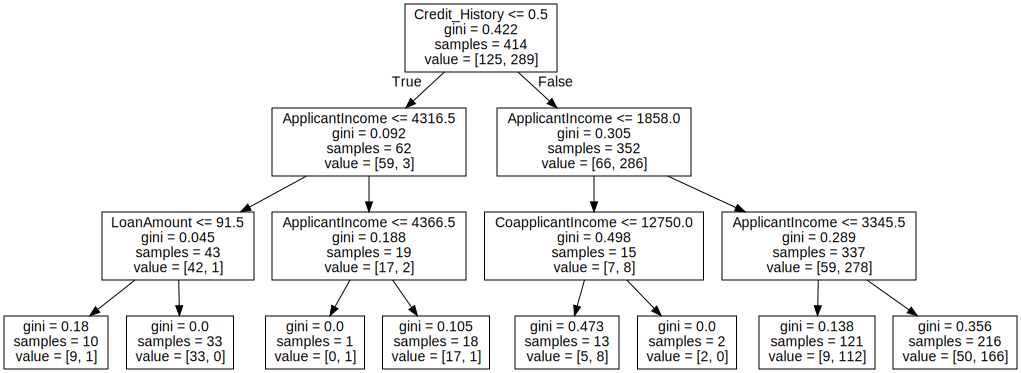

In [ ]:
import graphviz
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

dd = tree.export_graphviz(clf, feature_names = X.columns.tolist())
graph = graphviz.Source(dd)
graph

In [ ]:
import pickle

out = open('/content/drive/MyDrive/Datasets/Automatic Loan Prediction System.pkl', mode = 'wb')
pickle.dump(dt, out)
out.close()

## HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [10, 20, 25, 35, 50],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")


In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
CPU times: user 1.3 s, sys: 32.4 ms, total: 1.33 s
Wall time: 4.79 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3,
                                              min_samples_split=35),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [10, 20, 25, 35, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, min_samples_split=10)

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.8366336633663366
Train Confusion Matrix:
[[ 60  61]
 [  5 278]]
--------------------------------------------------
Test Accuracy : 0.8
Test Confusion Matrix:
[[13 26]
 [ 1 95]]


Text(87.0, 0.5, 'Truth')

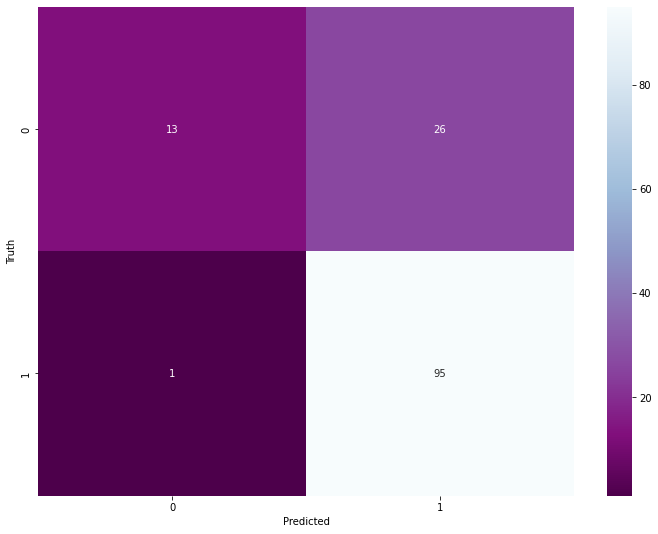

In [ ]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, dt_best.predict(X_test))

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, cmap='BuPu_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  



In [ ]:
rf_best = rf_random.best_params_

In [ ]:
randmf = RandomForestClassifier(n_estimators = 20, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( X_train, y_train)

RandomForestClassifier(max_depth=120, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=20)

In [ ]:
y_pred_rf = randmf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.7913669064748201

In [ ]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
384,0,1
255,1,1
395,1,1
510,0,1
533,0,1
...,...,...
489,0,1
315,1,1
366,0,1
383,1,1


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.37      0.51        41
           1       0.79      0.97      0.87        98

    accuracy                           0.79       139
   macro avg       0.81      0.67      0.69       139
weighted avg       0.80      0.79      0.76       139



In [ ]:
f1_score(y_test, y_pred_rf)

0.867579908675799

Text(87.0, 0.5, 'Truth')

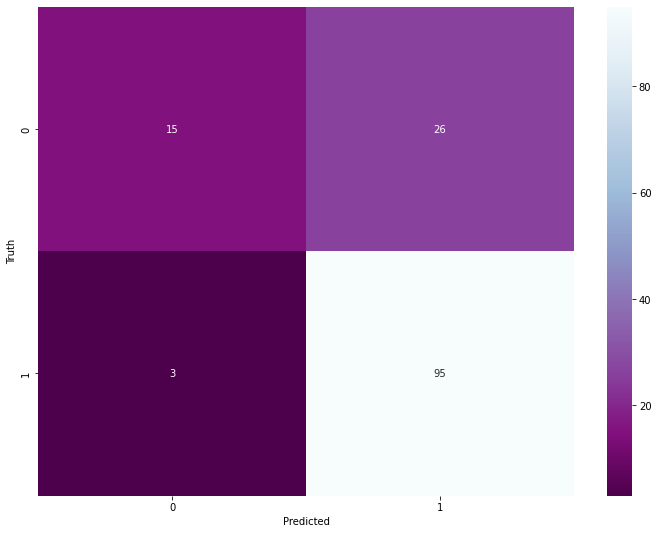

In [ ]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, cmap='BuPu_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')